# Agrupación (clustering) de clientes
#### JJD-Predictors

## Agrupación (clustering) de clientes según sus tipos de gastos

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


### Carga de transacciones categorizadas

In [2]:
#data_transactions_categorized = pd.read_pickle("./transactions_with_category.pkl")
data_transactions_categorized = pd.read_pickle("C:/Users/alejo/Documents/Docs.U_Locales/Dataton/transactions_classified_ligera_StemmingSVM.pkl")
data_transactions_categorized.sort_values(['id_cliente'])

,id_trn_ach,id_cliente,fecha,hora,valor_trx,ref,clasificacion
407187,311286739,1,2018-01-31,16:42,82570.87,servici public,Hogar
5723309,288937684,1,2017-10-18,13:30,76183.50,postpag,TyC
5868610,295573404,1,2017-11-20,11:41,79652.03,postpag,TyC
160705,254425329,10,2017-04-24,13:37,205306.68,presentacion impuest vehicul automotor,Gobierno
15898,250745406,10,2017-04-03,17:54,365426.24,presentacion impuest predial unific,Gobierno
810,250746100,10,2017-04-03,17:57,337869.05,presentacion impuest predial unific,Gobierno
6357851,300214320,10,2017-12-10,18:05,195577.09,hog multiplay,TyC
3022981,225005230,10,2016-11-03,11:16,126518.14,referent contrat valor,Otros
3022982,245879569,10,2017-03-07,17:17,145322.10,referent contrat valor,Otros
6376504,293895651,10,2017-11-11,18:16,211452.80,hog multiplay,TyC


### Obtención del valor promedio de las transacciones por categoría para cada cliente

#### Valor promedio de transacciones por categoría agrupadas por cliente

In [3]:
client_transactions_per_class=data_transactions_categorized.groupby(['id_cliente','clasificacion'])['valor_trx'].mean().reset_index(name='valor_total')
client_transactions_per_class=client_transactions_per_class.sort_values(['id_cliente','valor_total'])
client_transactions_per_class

,id_cliente,clasificacion,valor_total
1,1,TyC,77917.765000
0,1,Hogar,82570.870000
3,10,Indefinido,22519.390000
6,10,TyC,119934.482903
4,10,Otros,191968.613333
2,10,Gobierno,201806.926111
5,10,Subscripcion,369355.490000
11,100,TyC,79060.258333
7,100,Gobierno,92687.010000
10,100,Salud,128132.740000


#### Matriz de gasto promedio clienteXcategoría

In [4]:
client_trans_p_class_mat=client_transactions_per_class.pivot(index='id_cliente', columns='clasificacion', values='valor_total').fillna(0)
client_trans_p_class_mat

clasificacion,Comida,Educacion,Entretenimiento,Gobierno,Hogar,Indefinido,Moda,Otros,Pago de Deudas,Salud,Seguros,Subscripcion,Transporte,TyC,Viajes
id_cliente,,,,,,,,,,,,,,,
1,0.0,0.000000,0.000000,0.000000,82570.870000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,0.0000,77917.765000,0.000000
10,0.0,0.000000,0.000000,201806.926111,0.000000,22519.390000,0.0,191968.613333,0.000000,0.000000,0.000000,369355.490,0.0000,119934.482903,0.000000
100,0.0,0.000000,0.000000,92687.010000,0.000000,224878.255000,0.0,0.000000,355267.984286,128132.740000,0.000000,0.000,0.0000,79060.258333,0.000000
1000,0.0,0.000000,0.000000,0.000000,200216.191154,236231.861818,0.0,200944.858667,0.000000,0.000000,0.000000,0.000,0.0000,39310.784783,0.000000
10000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,0.0000,114594.335000,0.000000
100000,0.0,0.000000,0.000000,41008.300000,0.000000,136339.406250,0.0,0.000000,0.000000,0.000000,0.000000,0.000,0.0000,97257.560000,0.000000
100001,0.0,0.000000,0.000000,193318.417500,0.000000,98392.548000,0.0,154147.210000,107520.234286,96633.290000,524289.680000,0.000,0.0000,19983.750000,0.000000
100002,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,409114.940000,0.000,0.0000,0.000000,0.000000
100003,0.0,0.000000,0.000000,16304.286923,0.000000,129564.902857,0.0,0.000000,382452.230000,0.000000,0.000000,0.000,0.0000,157231.247143,0.000000


In [5]:
client_trans_p_class_mat.describe()

clasificacion,Comida,Educacion,Entretenimiento,Gobierno,Hogar,Indefinido,Moda,Otros,Pago de Deudas,Salud,Seguros,Subscripcion,Transporte,TyC,Viajes
count,318173.000000,318173.000000,318173.000000,318173.000000,318173.000000,318173.000000,318173.000000,318173.000000,318173.000000,318173.000000,318173.000000,318173.000000,318173.000000,318173.000000,318173.000000
mean,42.770246,34339.644953,10938.066155,38371.394657,38060.012196,83240.446120,332.916081,58867.009515,76597.193888,10630.676807,27523.522773,7761.900838,14088.433765,45854.650310,45571.268660
std,1768.170837,94471.104779,44626.438871,83180.668491,87522.771655,105195.962957,7029.020038,96787.245292,127401.709035,48186.482024,82218.513284,37272.502180,57807.779957,58747.090656,100988.143831
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,46263.037500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31524.641667,0.000000
75%,0.000000,0.000000,0.000000,37195.366000,0.000000,133835.306923,0.000000,94213.572000,136407.460000,0.000000,0.000000,0.000000,0.000000,72665.975000,0.000000
max,331901.080000,583493.190000,583112.620000,583485.670000,583352.720000,583493.940000,489715.130000,583343.040000,583352.890000,583464.800000,583478.610000,582930.210000,583440.640000,583201.800000,583393.150000


In [6]:
client_trans_p_class_mat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318173 entries, 1 to 99999
Data columns (total 15 columns):
Comida             318173 non-null float64
Educacion          318173 non-null float64
Entretenimiento    318173 non-null float64
Gobierno           318173 non-null float64
Hogar              318173 non-null float64
Indefinido         318173 non-null float64
Moda               318173 non-null float64
Otros              318173 non-null float64
Pago de Deudas     318173 non-null float64
Salud              318173 non-null float64
Seguros            318173 non-null float64
Subscripcion       318173 non-null float64
Transporte         318173 non-null float64
TyC                318173 non-null float64
Viajes             318173 non-null float64
dtypes: float64(15)
memory usage: 38.8+ MB


### Aplicación de k-means clustering

#### Evaluación del k óptimo usando el método "elbow"

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

"""
#kmeans = KMeans(n_clusters=4)
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
"""

scaler = MinMaxScaler()

In [8]:
client_trans_p_class_arr=np.array(client_trans_p_class_mat)

In [9]:
client_trans_p_class_scaled = scaler.fit_transform(client_trans_p_class_arr) #Escala los datos de cada caracteristica a un rango de 0 a 1

In [12]:
#Cálculo del score para los diferentes k (ejecuta también el entrenamiento del modelo)

#score = [kmeans[i].fit(client_trans_p_class_scaled).score(client_trans_p_class_scaled) for i in range(len(kmeans))]

In [20]:
import pickle

"""
#Se guarda el modelo entrenado para futuros usos

outfile = open("./kmeans_expenses.pkl",'wb')

pickle.dump(kmeans,outfile)

outfile.close()
"""

#Se carga el modelo guardado previamente para evitar volver a hacer el entrenamiento

infile = open("./kmeans_expenses.pkl",'rb')

kmeans = pickle.load(infile)

infile.close()

Nc = range(1, 20)

score = [kmeans[i].score(client_trans_p_class_scaled) for i in range(len(kmeans))]

score = np.array(score).ravel()

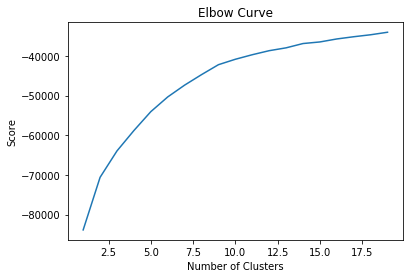

In [21]:
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

#### Entrenamiento y predicción del modelo con el k óptimo

In [22]:
kmeansModel=kmeans[9]

predictions=kmeansModel.predict(client_trans_p_class_scaled) #Evalúa el modelo en el dataset

In [23]:
clustered_clients=pd.DataFrame(client_trans_p_class_mat.index)
clustered_clients["grupo"]=predictions
clustered_clients

,id_cliente,grupo
0,1,3
1,10,6
2,100,1
3,1000,4
4,10000,3
5,100000,3
6,100001,8
7,100002,8
8,100003,1
9,100004,8


#### Evaluación

In [24]:
clients_by_group=clustered_clients.groupby("grupo").grupo.value_counts()
clients_by_group


grupo  grupo
0      0         16752
1      1         20935
2      2         26872
3      3        129284
4      4         18545
5      5         33286
6      6         20872
7      7         12524
8      8         12899
9      9         26204
Name: grupo, dtype: int64

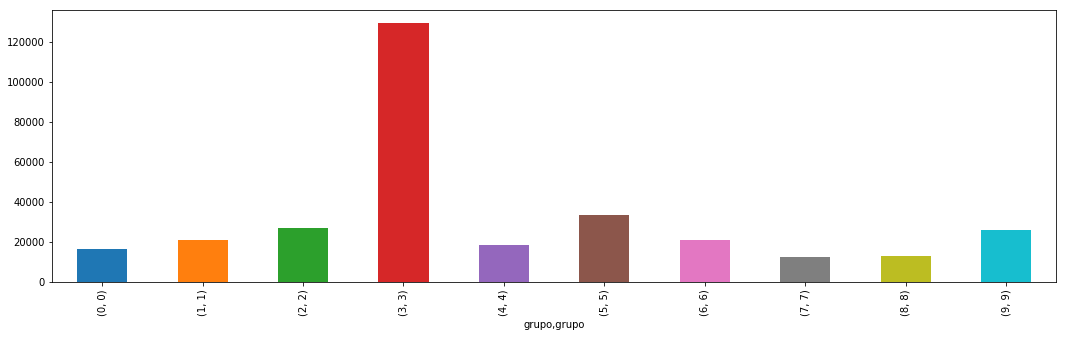

In [25]:
clients_by_group.plot(kind='bar',figsize = (18,5))

#### Características por grupo

In [26]:
data_clients = pd.read_pickle("./data_clients.pkl")
data_clients

,id_cliente,seg_str,ocupacion,nivel_academico,estado_civil,genero,edad,ingreso_rango
0,18,PERSONAL PLUS,JUBILADO,UNIVERSITARIO,CASADO,M,92.0,5.0
1,32,PERSONAL PLUS,EMPLEADO_SOCIO,TECNICO,CASADO,M,80.0,9.0
2,41,EMPRENDEDOR,INDEPENDIENTE,NO_INFORMA,VIUDO,M,90.0,1.5
3,47,EMPRENDEDOR,GANADERO,NO_INFORMA,NO_INFORMA,M,86.0,2.5
4,71,PERSONAL,JUBILADO,POSTGRADO,CASADO,M,79.0,5.0
5,72,PERSONAL,EMPLEADO,UNIVERSITARIO,CASADO,M,74.0,1.5
6,102,PREFERENCIAL,RENTISTA_DE_CAPITAL,UNIVERSITARIO,CASADO,M,86.0,9.0
7,108,PERSONAL PLUS,EMPLEADO,UNIVERSITARIO,CASADO,F,37.0,6.0
8,210,EMPRENDEDOR,INDEPENDIENTE,UNIVERSITARIO,CASADO,M,34.0,9.0
9,226,EMPRENDEDOR,INDEPENDIENTE,TECNICO,DESCONOCIDO,M,56.0,8.0


In [27]:
clustered_clients.id_cliente = clustered_clients.id_cliente.apply(pd.to_numeric)
clustered_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318173 entries, 0 to 318172
Data columns (total 2 columns):
id_cliente    318173 non-null int64
grupo         318173 non-null int32
dtypes: int32(1), int64(1)
memory usage: 3.6 MB


In [28]:
client_trans_p_class_mat = client_trans_p_class_mat.reset_index()
client_trans_p_class_mat.id_cliente = client_trans_p_class_mat.id_cliente.apply(pd.to_numeric)
client_trans_p_class_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318173 entries, 0 to 318172
Data columns (total 16 columns):
id_cliente         318173 non-null int64
Comida             318173 non-null float64
Educacion          318173 non-null float64
Entretenimiento    318173 non-null float64
Gobierno           318173 non-null float64
Hogar              318173 non-null float64
Indefinido         318173 non-null float64
Moda               318173 non-null float64
Otros              318173 non-null float64
Pago de Deudas     318173 non-null float64
Salud              318173 non-null float64
Seguros            318173 non-null float64
Subscripcion       318173 non-null float64
Transporte         318173 non-null float64
TyC                318173 non-null float64
Viajes             318173 non-null float64
dtypes: float64(15), int64(1)
memory usage: 38.8 MB


In [29]:
data_clients_grouped = pd.merge(data_clients,clustered_clients, on = 'id_cliente' ) #Hacer merge de info del cliente con su respectivo grupo
data_clients_grouped = data_clients_grouped.groupby(['grupo'])

client_transactions_grouped = pd.merge(client_trans_p_class_mat, clustered_clients, on = 'id_cliente' ) #Hacer merge de info del cliente con su respectivo grupo
client_transactions_grouped = client_transactions_grouped.groupby(['grupo'])

##### Gasto por categoría

In [30]:
group_expenses = client_transactions_grouped.mean().drop(columns=['id_cliente'])
group_expenses

,Comida,Educacion,Entretenimiento,Gobierno,Hogar,Indefinido,Moda,Otros,Pago de Deudas,Salud,Seguros,Subscripcion,Transporte,TyC,Viajes
grupo,,,,,,,,,,,,,,,
0,83.935239,366157.614993,17808.892076,52043.700085,51809.860185,108229.629790,602.051697,78812.945073,91034.087553,15796.443194,31329.000287,13318.579048,44735.441716,60038.994448,50175.232368
1,70.253264,35416.910822,22945.709039,56989.356222,59529.285889,128129.113590,667.983244,104253.491231,395572.819355,23432.499166,35955.605621,13342.257079,27355.940884,68861.163018,59698.465742
2,12.205833,12167.770499,7859.523063,21095.329482,13591.796070,292060.260681,232.800679,29145.181035,27339.426433,9340.982221,10242.535672,6825.350949,9826.280108,40860.829437,22286.012093
3,17.560745,7485.290012,5351.596158,14228.112186,9094.344126,28387.385529,114.815003,17794.764016,6183.413226,5830.916934,5701.378591,4123.252796,5814.129863,33282.127799,9393.582338
4,153.410562,28266.155787,18877.768155,37197.018812,286067.340927,104034.268001,529.375385,99954.279661,62637.459812,9585.852053,24001.787088,10827.459362,24451.386079,60464.510225,32699.619766
5,37.900057,12020.926248,11692.422029,20929.020071,17428.212457,52380.067976,362.421327,33089.360449,222247.179872,12848.813538,11058.769583,7690.124130,10504.965476,48820.892094,14855.760031
6,37.932159,17727.935495,12503.911055,29933.716652,27265.549433,78028.430780,363.993744,287689.022014,53209.914813,12566.904647,15823.089992,8422.413447,16602.796969,52631.040216,24954.939206
7,56.417285,26607.625778,15116.843957,339886.742337,43571.890071,96358.121592,442.331833,64494.855156,73362.888070,14987.129879,29641.481895,11288.381594,21399.924376,57698.455591,36984.918468
8,80.821731,42341.395514,23066.720736,55089.183988,60342.201089,116938.071934,810.841332,85448.706374,94081.500197,19174.869337,344163.905091,14360.184535,27618.330122,67588.958347,54526.694857


##### Gasto total

In [31]:
group_expenses_tot = group_expenses.sum(axis=1)
group_expenses_tot

grupo
0    9.819764e+05
1    1.032221e+06
2    5.028863e+05
3    1.528027e+05
4    7.997477e+05
5    4.759668e+05
6    6.377616e+05
7    8.318980e+05
8    1.005632e+06
9    6.833657e+05
dtype: float64

##### Género

In [32]:
group_gender = data_clients_grouped.genero.value_counts().reset_index(name='cantidad') #Obtener cantidad de clientes por genero en cada grupo
group_gender = group_gender.groupby(['grupo','genero']).sum() #Agrupar por grupo y género
group_gender = group_gender.groupby(level=0).apply(lambda x: x / x.sum()) #Obtener  porcentaje de cada género en el grupo
group_gender

cantidad
grupo genero          
0     F       0.504091
      M       0.495909
1     F       0.512183
      M       0.487817
2     F       0.511294
      M       0.488706
3     F       0.502110
      M       0.497890
4     F       0.541040
      M       0.458960
5     F       0.522745
      M       0.477255
6     F       0.517342
      M       0.482658
7     F       0.457007
      M       0.542993
8     F       0.489577
      M       0.510423
9     F       0.519586
      M       0.480414

##### Edad

In [33]:
group_age = data_clients_grouped.edad.mean().reset_index(name='edad_promedio')
group_age

,grupo,edad_promedio
0,0,37.094758
1,1,38.747713
2,2,36.694460
3,3,35.429746
4,4,39.924803
5,5,35.838041
6,6,36.985724
7,7,40.923312
8,8,39.152663
9,9,35.615537


##### Rango de ingresos

In [34]:
group_income = data_clients_grouped.ingreso_rango.mean().reset_index(name='ingreso_promedio')
group_income

,grupo,ingreso_promedio
0,0,4.045127
1,1,4.491119
2,2,3.409898
3,3,2.677715
4,4,4.072808
5,5,3.028028
6,6,3.603922
7,7,4.600922
8,8,4.888008
9,9,3.599563


##### Ocupación

In [37]:
pd.set_option('display.max_rows', 150)

group_ocupation = data_clients_grouped.ocupacion.value_counts().reset_index(name='cantidad')
group_ocupation = group_ocupation.groupby(['grupo','ocupacion']).sum()
group_ocupation = group_ocupation.groupby(level=0).apply(lambda x: x / x.sum())#.reset_index()
group_ocupation = group_ocupation.sort_values(['grupo','cantidad'], ascending=[True, False])
group_ocupation

cantidad
grupo ocupacion                         
0     EMPLEADO                  0.664729
      INDEPENDIENTE             0.143618
      ESTUDIANTE                0.090503
      EMPLEADO_SOCIO            0.030351
      JUBILADO                  0.017868
      COMERCIANTE               0.015359
      HOGAR                     0.013217
      OTRA                      0.010158
      RENTISTA_DE_CAPITAL       0.006609
      DESEMPLEADO_SIN_INGRESOS  0.003366
      DESEMPLEADO_CON_INGRESOS  0.002570
      GANADERO                  0.001040
      AGRICULTOR                0.000612
1     EMPLEADO                  0.665213
      INDEPENDIENTE             0.174154
      ESTUDIANTE                0.043747
      EMPLEADO_SOCIO            0.035125
      JUBILADO                  0.029589
      COMERCIANTE               0.016362
      HOGAR                     0.012492
      OTRA                      0.008916
      RENTISTA_DE_CAPITAL       0.007054
      DESEMPLEADO_SIN_INGRESOS  0.003821
      DESEMPLEADO_CON_INGRESOS  0.001862
      GANADERO                  0.001029
      AGRICULTOR                0.000637
2     EMPLEADO                  0.614791
      INDEPENDIENTE             0.157952
      ESTUDIANTE                0.100430
      EMPLEADO_SOCIO            0.028567
      JUBILADO                  0.026474
      COMERCIANTE               0.024303
      HOGAR                     0.018412
      OTRA                      0.012675
      RENTISTA_DE_CAPITAL       0.006667
      DESEMPLEADO_SIN_INGRESOS  0.004535
      DESEMPLEADO_CON_INGRESOS  0.003411
      GANADERO                  0.001085
      AGRICULTOR                0.000698
3     EMPLEADO                  0.631520
      INDEPENDIENTE             0.133448
      ESTUDIANTE                0.121176
      JUBILADO                  0.028310
      EMPLEADO_SOCIO            0.021776
      HOGAR                     0.018091
      COMERCIANTE               0.017840
      OTRA                      0.012556
      RENTISTA_DE_CAPITAL       0.005422
      DESEMPLEADO_SIN_INGRESOS  0.004472
      DESEMPLEADO_CON_INGRESOS  0.003742
      GANADERO                  0.000877
      AGRICULTOR                0.000771
4     EMPLEADO                  0.622396
      INDEPENDIENTE             0.163639
      ESTUDIANTE                0.063878
      JUBILADO                  0.045548
      EMPLEADO_SOCIO            0.033383
      HOGAR                     0.024885
      COMERCIANTE               0.014998
      RENTISTA_DE_CAPITAL       0.012442
      OTRA                      0.011054
      DESEMPLEADO_SIN_INGRESOS  0.003444
      DESEMPLEADO_CON_INGRESOS  0.002666
      GANADERO                  0.001055
      AGRICULTOR                0.000611
5     EMPLEADO                  0.691744
      INDEPENDIENTE             0.139932
      ESTUDIANTE                0.069165
      JUBILADO                  0.025313
      EMPLEADO_SOCIO            0.022634
      COMERCIANTE               0.014443
      HOGAR                     0.013704
      OTRA                      0.011148
      RENTISTA_DE_CAPITAL       0.004434
      DESEMPLEADO_SIN_INGRESOS  0.003788
      DESEMPLEADO_CON_INGRESOS  0.002402
      GANADERO                  0.000677
      AGRICULTOR                0.000616
6     EMPLEADO                  0.664063
      INDEPENDIENTE             0.140880
      ESTUDIANTE                0.081167
      JUBILADO                  0.030400
      EMPLEADO_SOCIO            0.028571
      COMERCIANTE               0.015670
      HOGAR                     0.014039
      OTRA                      0.011270
      RENTISTA_DE_CAPITAL       0.005981
      DESEMPLEADO_SIN_INGRESOS  0.003806
      DESEMPLEADO_CON_INGRESOS  0.002867
      GANADERO                  0.000692
      AGRICULTOR                0.000593
7     EMPLEADO                  0.673476
      INDEPENDIENTE             0.141680
      JUBILADO                  0.048847
      ESTUDIANTE                0.041598
      EMPLEADO_SOCIO            0.034432
      HOGAR   

## Agrupación (clustering) de clientes según sus características demográficas

### Exploración de los datos

In [38]:
data_clients_ordered = data_clients.sort_values(['id_cliente'])
data_clients_ordered

,id_cliente,seg_str,ocupacion,nivel_academico,estado_civil,genero,edad,ingreso_rango
307765,1,PREFERENCIAL,JUBILADO,UNIVERSITARIO,VIUDO,M,92.0,7.0
30636,2,PERSONAL PLUS,JUBILADO,POSTGRADO,CASADO,M,87.0,9.0
107698,3,PERSONAL,RENTISTA_DE_CAPITAL,UNIVERSITARIO,CASADO,M,89.0,1.5
15429,5,PERSONAL,JUBILADO,BACHILLERATO,CASADO,M,91.0,2.5
46053,7,PERSONAL PLUS,JUBILADO,UNIVERSITARIO,CASADO,M,90.0,6.0
184383,8,PERSONAL,JUBILADO,UNIVERSITARIO,SOLTERO,M,88.0,5.0
246301,9,PERSONAL,JUBILADO,UNIVERSITARIO,CASADO,M,91.0,3.5
123121,10,PERSONAL,JUBILADO,PRIMARIA,CASADO,M,89.0,2.5
153945,11,PERSONAL,JUBILADO,POSTGRADO,VIUDO,M,88.0,1.5
61373,12,PERSONAL PLUS,JUBILADO,UNIVERSITARIO,CASADO,M,86.0,5.0


In [39]:
demog_data_clients=data_clients_ordered.drop(columns=['id_cliente','seg_str'])
demog_data_clients

,ocupacion,nivel_academico,estado_civil,genero,edad,ingreso_rango
307765,JUBILADO,UNIVERSITARIO,VIUDO,M,92.0,7.0
30636,JUBILADO,POSTGRADO,CASADO,M,87.0,9.0
107698,RENTISTA_DE_CAPITAL,UNIVERSITARIO,CASADO,M,89.0,1.5
15429,JUBILADO,BACHILLERATO,CASADO,M,91.0,2.5
46053,JUBILADO,UNIVERSITARIO,CASADO,M,90.0,6.0
184383,JUBILADO,UNIVERSITARIO,SOLTERO,M,88.0,5.0
246301,JUBILADO,UNIVERSITARIO,CASADO,M,91.0,3.5
123121,JUBILADO,PRIMARIA,CASADO,M,89.0,2.5
153945,JUBILADO,POSTGRADO,VIUDO,M,88.0,1.5
61373,JUBILADO,UNIVERSITARIO,CASADO,M,86.0,5.0


In [40]:
demog_data_clients.count()

ocupacion          325033
nivel_academico    289173
estado_civil       324517
genero             325866
edad               323161
ingreso_rango      325872
dtype: int64

In [41]:
print(demog_data_clients.isna().sum())

ocupacion            839
nivel_academico    36699
estado_civil        1355
genero                 6
edad                2711
ingreso_rango          0
dtype: int64


### Limpieza de datos

In [42]:
demog_data_clients["ocupacion"] = demog_data_clients["ocupacion"].fillna("NO_INFORMA")
demog_data_clients["nivel_academico"] = demog_data_clients["nivel_academico"].fillna("NO_INFORMA")
demog_data_clients["estado_civil"] = demog_data_clients["estado_civil"].fillna("NO_INFORMA")
demog_data_clients["genero"] = demog_data_clients["genero"].fillna("NO_INFORMA")
age_mean = demog_data_clients.edad.mean()
demog_data_clients["edad"] = demog_data_clients["edad"].fillna(age_mean)

demog_data_clients

,ocupacion,nivel_academico,estado_civil,genero,edad,ingreso_rango
307765,JUBILADO,UNIVERSITARIO,VIUDO,M,92.0,7.0
30636,JUBILADO,POSTGRADO,CASADO,M,87.0,9.0
107698,RENTISTA_DE_CAPITAL,UNIVERSITARIO,CASADO,M,89.0,1.5
15429,JUBILADO,BACHILLERATO,CASADO,M,91.0,2.5
46053,JUBILADO,UNIVERSITARIO,CASADO,M,90.0,6.0
184383,JUBILADO,UNIVERSITARIO,SOLTERO,M,88.0,5.0
246301,JUBILADO,UNIVERSITARIO,CASADO,M,91.0,3.5
123121,JUBILADO,PRIMARIA,CASADO,M,89.0,2.5
153945,JUBILADO,POSTGRADO,VIUDO,M,88.0,1.5
61373,JUBILADO,UNIVERSITARIO,CASADO,M,86.0,5.0


### Codificación de etiquetas

In [43]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

In [44]:
encoded_demog_data_clients = demog_data_clients

In [45]:
encoded_demog_data_clients['ocupacion'] = labelEncoder.fit_transform(demog_data_clients['ocupacion'])

In [46]:
encoded_demog_data_clients['nivel_academico'] = labelEncoder.fit_transform(demog_data_clients['nivel_academico'])

In [47]:
encoded_demog_data_clients['estado_civil'] = labelEncoder.fit_transform(demog_data_clients['estado_civil'])

In [48]:
encoded_demog_data_clients['genero'] = labelEncoder.fit_transform(demog_data_clients['genero'])

In [49]:
encoded_demog_data_clients

,ocupacion,nivel_academico,estado_civil,genero,edad,ingreso_rango
307765,10,7,6,1,92.0,7.0
30636,10,4,0,1,87.0,9.0
107698,13,7,0,1,89.0,1.5
15429,10,0,0,1,91.0,2.5
46053,10,7,0,1,90.0,6.0
184383,10,7,5,1,88.0,5.0
246301,10,7,0,1,91.0,3.5
123121,10,5,0,1,89.0,2.5
153945,10,4,6,1,88.0,1.5
61373,10,7,0,1,86.0,5.0


### Aplicación de k-means clustering

#### Evaluación del k óptimo usando el método "elbow"

In [50]:
Nc = range(1, 10)
kmeans_demog = [KMeans(n_clusters=i) for i in Nc]

scaler_demog = MinMaxScaler()

In [51]:
encoded_demog_arr=np.array(encoded_demog_data_clients)

In [52]:
encoded_demog_scaled = scaler_demog.fit_transform(encoded_demog_arr) #Escala los datos de cada caracteristica a un rango de 0 a 1

score_demog = [kmeans_demog[i].fit(encoded_demog_scaled).score(encoded_demog_scaled) for i in range(len(kmeans_demog))]

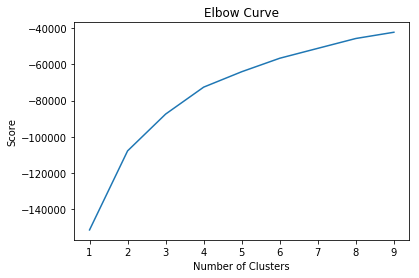

In [53]:
plt.plot(Nc,score_demog)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

#### Entrenamiento y predicción del modelo con el k óptimo

In [70]:
kmeansModel_demog=kmeans_demog[2]

predictions_demog=kmeansModel_demog.predict(encoded_demog_scaled) #Evalúa el modelo en el dataset

In [71]:
clustered_clients_demog=pd.DataFrame(data_clients_ordered.id_cliente)
clustered_clients_demog["grupo"]=predictions_demog
clustered_clients_demog

,id_cliente,grupo
307765,1,2
30636,2,1
107698,3,1
15429,5,1
46053,7,1
184383,8,2
246301,9,1
123121,10,1
153945,11,0
61373,12,1


##### Exportar clientes agrupados

In [72]:
clustered_clients_demog.to_pickle("./clustered_clients_demog.pkl")

#### Evaluación

In [73]:
clients_demog_group=clustered_clients_demog.groupby("grupo").grupo.value_counts()
clients_demog_group

grupo  grupo
0      0        108728
1      1        108795
2      2        108349
Name: grupo, dtype: int64

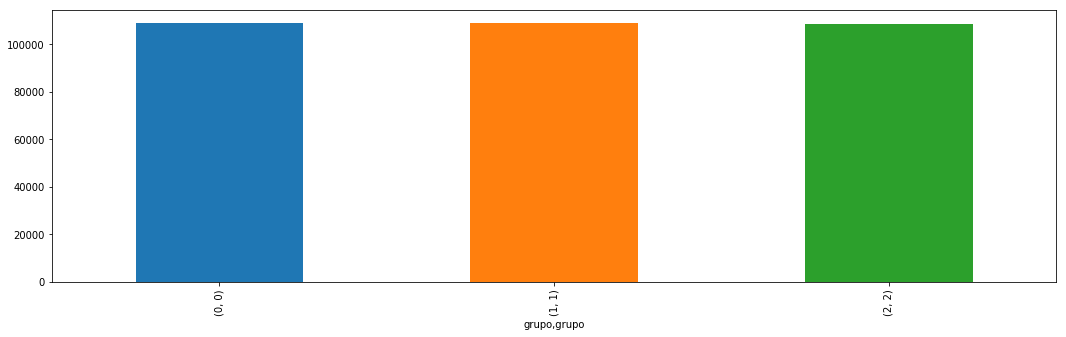

In [74]:
clients_demog_group.plot(kind='bar',figsize = (18,5))

#### Características por grupo

In [75]:
data_clients_group_demog = pd.merge(data_clients_ordered,clustered_clients_demog, on = 'id_cliente' ) #Hacer merge de info del cliente con su respectivo grupo
data_clients_group_demog = data_clients_group_demog.groupby(['grupo'])

client_trans_grouped_demog = pd.merge(client_trans_p_class_mat, clustered_clients_demog, on = 'id_cliente' ) #Hacer merge de info del cliente con su respectivo grupo
client_trans_grouped_demog = client_trans_grouped_demog.groupby(['grupo'])

##### Gasto por categoría

In [76]:
group_expenses_demog = client_trans_grouped_demog.mean().drop(columns=['id_cliente'])
group_expenses_demog

,Comida,Educacion,Entretenimiento,Gobierno,Hogar,Indefinido,Moda,Otros,Pago de Deudas,Salud,Seguros,Subscripcion,Transporte,TyC,Viajes
grupo,,,,,,,,,,,,,,,
0,24.835045,26534.399321,7487.321262,24137.762997,28071.322475,70208.475354,214.263677,47261.602832,57142.919042,6768.616432,18141.949557,5804.901371,7964.366589,37260.927330,40708.750071
1,52.584925,43171.517709,13719.472346,51983.729849,49565.196526,94208.091182,395.164796,68382.533632,92480.413235,14472.139097,36136.285281,9240.616034,21892.728440,51621.692834,45613.704734
2,54.723337,34644.531482,11748.686352,39680.311317,37454.879507,86378.032685,415.088787,62491.126474,83104.343901,10606.902701,28396.334123,8472.596283,12747.396369,48782.901568,51069.636593


##### Gasto total

In [77]:
group_expenses_demog_tot = group_expenses_demog.sum(axis=1)
group_expenses_demog_tot

grupo
0    377732.413354
1    592935.870620
2    516047.491477
dtype: float64

##### Género

In [78]:
group_gender_demog = data_clients_group_demog.genero.value_counts().reset_index(name='cantidad') #Obtener cantidad de clientes por genero en cada grupo
group_gender_demog = group_gender_demog.groupby(['grupo','genero']).sum() #Agrupar por grupo y género
group_gender_demog = group_gender_demog.groupby(level=0).apply(lambda x: x / x.sum()) #Obtener  porcentaje de cada género en el grupo
group_gender_demog

cantidad
grupo genero          
0     F       0.517043
      M       0.482957
1     F       0.468159
      M       0.531841
2     F       0.540287
      M       0.459713

##### Edad

In [79]:
group_age_demog = data_clients_group_demog.edad.mean().reset_index(name='edad_promedio')
group_age_demog

,grupo,edad_promedio
0,0,32.118595
1,1,43.969260
2,2,34.697281


##### Rango de ingresos

In [80]:
group_income_demog = data_clients_group_demog.ingreso_rango.mean().reset_index(name='ingreso_promedio')
group_income_demog

,grupo,ingreso_promedio
0,0,2.163330
1,1,4.825833
2,2,3.126909


##### Ocupación

In [81]:
data_clients_group_demog.ocupacion.value_counts()

grupo  ocupacion               
0      EMPLEADO                    64013
       ESTUDIANTE                  21041
       INDEPENDIENTE               11266
       HOGAR                        2467
       JUBILADO                     2255
       COMERCIANTE                  2210
       OTRA                         1862
       EMPLEADO_SOCIO               1429
       DESEMPLEADO_SIN_INGRESOS      428
       RENTISTA_DE_CAPITAL           421
       DESEMPLEADO_CON_INGRESOS      376
       GANADERO                       88
       AGRICULTOR                     85
1      EMPLEADO                    66349
       INDEPENDIENTE               22529
       JUBILADO                     5564
       EMPLEADO_SOCIO               5056
       COMERCIANTE                  2704
       HOGAR                        2571
       RENTISTA_DE_CAPITAL          1335
       OTRA                          844
       ESTUDIANTE                    843
       DESEMPLEADO_SIN_INGRESOS      357
       DESEMPLEADO_CON_IN

In [82]:
group_ocupation_demog = data_clients_group_demog.ocupacion.value_counts().reset_index(name='cantidad')
group_ocupation_demog = group_ocupation_demog.groupby(['grupo','ocupacion']).sum()
group_ocupation_demog = group_ocupation_demog.groupby(level=0).apply(lambda x: x / x.sum())#.reset_index()
group_ocupation_demog = group_ocupation_demog.sort_values(['grupo','cantidad'], ascending=[True, False])
group_ocupation_demog

cantidad
grupo ocupacion                         
0     EMPLEADO                  0.593037
      ESTUDIANTE                0.194931
      INDEPENDIENTE             0.104372
      HOGAR                     0.022855
      JUBILADO                  0.020891
      COMERCIANTE               0.020474
      OTRA                      0.017250
      EMPLEADO_SOCIO            0.013239
      DESEMPLEADO_SIN_INGRESOS  0.003965
      RENTISTA_DE_CAPITAL       0.003900
      DESEMPLEADO_CON_INGRESOS  0.003483
      GANADERO                  0.000815
      AGRICULTOR                0.000787
1     EMPLEADO                  0.610134
      INDEPENDIENTE             0.207173
      JUBILADO                  0.051166
      EMPLEADO_SOCIO            0.046494
      COMERCIANTE               0.024866
      HOGAR                     0.023642
      RENTISTA_DE_CAPITAL       0.012276
      OTRA                      0.007761
      ESTUDIANTE                0.007752
      DESEMPLEADO_SIN_INGRESOS  0.003283
      DESEMPLEADO_CON_INGRESOS  0.002731
      GANADERO                  0.001600
      AGRICULTOR                0.001122
2     EMPLEADO                  0.698275
      INDEPENDIENTE             0.139718
      ESTUDIANTE                0.078932
      EMPLEADO_SOCIO            0.022696
      JUBILADO                  0.018552
      COMERCIANTE               0.010494
      OTRA                      0.010189
      HOGAR                     0.006876
      DESEMPLEADO_SIN_INGRESOS  0.004956
      RENTISTA_DE_CAPITAL       0.004836
      DESEMPLEADO_CON_INGRESOS  0.003470
      GANADERO                  0.000554
      AGRICULTOR                0.000452